In [9]:
import json

with open('Sample_Data.json') as f:
  data = json.load(f)

In [10]:
print(data['people'][0]['name'])
print(data['people'][0]['phone'])

John Doe
+1-202-555-0167


In [11]:
import json
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

with open('Sample Data.json') as f:
    data = json.load(f)

people = data['people']
n_people = len(people)
lat_lon = [[person['latitude'], person['longitude']] for person in people]
messages = [person['spam_message'] for person in people]

lat_lon_similarity = cosine_similarity(lat_lon)
print('Similarity based on latitude and longitude:\n', lat_lon_similarity)

vectorizer = CountVectorizer()
message_vectors = vectorizer.fit_transform(messages)
message_similarity = cosine_similarity(message_vectors)
print('Similarity based on spam messages:\n', message_similarity)


combined_similarity = (0.7 * lat_lon_similarity) + (0.3 * message_similarity)
print('Combined similarity:\n', combined_similarity)


Similarity based on latitude and longitude:
 [[1.         0.99998004 0.99999307 0.99999999 0.99999999 0.99999999
  0.99999601 1.         0.99999999 0.99999999]
 [0.99998004 1.         0.99999663 0.99997923 0.99998069 0.9999808
  0.9999939  0.99997994 0.99997919 0.99998085]
 [0.99999307 0.99999663 1.         0.99999259 0.99999345 0.99999352
  0.9999996  0.99999301 0.99999257 0.99999355]
 [0.99999999 0.99997923 0.99999259 1.         0.99999997 0.99999997
  0.99999564 0.99999999 1.         0.99999997]
 [0.99999999 0.99998069 0.99999345 0.99999997 1.         1.
  0.9999963  0.99999999 0.99999997 1.        ]
 [0.99999999 0.9999808  0.99999352 0.99999997 1.         1.
  0.99999635 0.99999999 0.99999997 1.        ]
 [0.99999601 0.9999939  0.9999996  0.99999564 0.9999963  0.99999635
  1.         0.99999596 0.99999563 0.99999637]
 [1.         0.99997994 0.99999301 0.99999999 0.99999999 0.99999999
  0.99999596 1.         0.99999999 0.99999999]
 [0.99999999 0.99997919 0.99999257 1.         0.9999

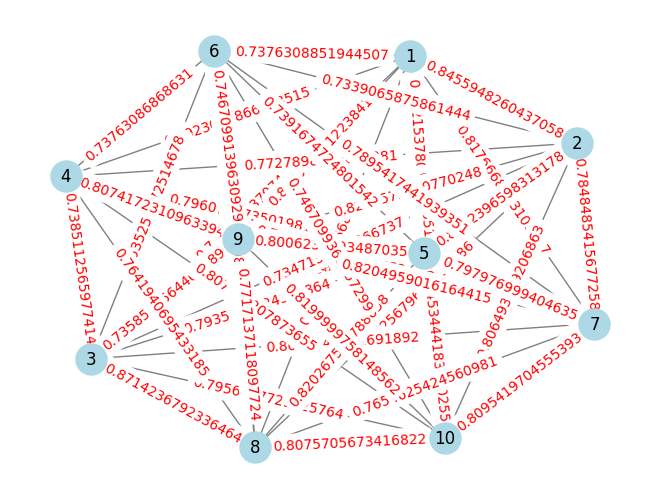

In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

with open('Sample Data.json') as f:
    data = json.load(f)

people = data['people']
n_people = len(people)
lat_lon = [[person['latitude'], person['longitude']] for person in people]
messages = [person['spam_message'] for person in people]


lat_lon_similarity = cosine_similarity(lat_lon)


vectorizer = CountVectorizer()
message_vectors = vectorizer.fit_transform(messages)
message_similarity = cosine_similarity(message_vectors)
combined_similarity = (0.7 * lat_lon_similarity) + (0.3 * message_similarity)

G = nx.Graph()


for i in range(n_people):
    G.add_node(i+1)


threshold = 0.6 # adjust threshold for similarity score
for i in range(n_people):
    for j in range(i+1, n_people):
        if i != j and combined_similarity[i][j] >= threshold:
            G.add_edge(i+1, j+1, weight=combined_similarity[i][j])

# Draw graph
pos = nx.spring_layout(G, k=0.3, seed=42) # adjust layout algorithm and random seed
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()


In [13]:
degrees = [(node, degree) for node, degree in G.degree()]


sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
print("Top 3 most connected nodes:")
for node, degree in sorted_degrees[:3]:
    print(f"Node {node}: {degree} connections")


Top 3 most connected nodes:
Node 1: 9 connections
Node 2: 9 connections
Node 3: 9 connections
